Make sure [vaex](http://vaex.astro.rug.nl/) works.

In [1]:
import pandas as pd
import vaex as vx

%matplotlib inline

Now for SDSS data

In [2]:
DATA_PATH = '../../../data/sdss_dr7_photometry_source.csv.gz'

In [3]:
def load_data(data_cols=('ra', 'dec', 'redshift'),
              filter_col='class',
              filter_val='Galaxy'):
    
    data_cols = list(data_cols)
    
    data_iter = pd.read_csv(
        DATA_PATH,
        iterator=True,
        chunksize=100000,
        usecols=data_cols + [filter_col])
    
    if filter_col is None:
        # Filtering disabled
        data = pd.concat(data_iter)
    else:
        # Filter out anything that is not a galaxy without loading the whole file into memory.
        data = pd.concat(chunk[chunk[filter_col] == filter_val]
                         for chunk in data_iter)

    return data


data = load_data()

In [4]:
data.head()

,ra,dec,class,redshift
3,196.236650,0.412347,Galaxy,0.617936
4,196.193644,0.389485,Galaxy,0.641332
5,196.220514,0.337969,Galaxy,0.663751
12,183.763514,-1.082955,Galaxy,0.390027
14,183.888350,-1.186661,Galaxy,0.604499


In [5]:
dataset = vx.from_pandas(data, name='sdss')

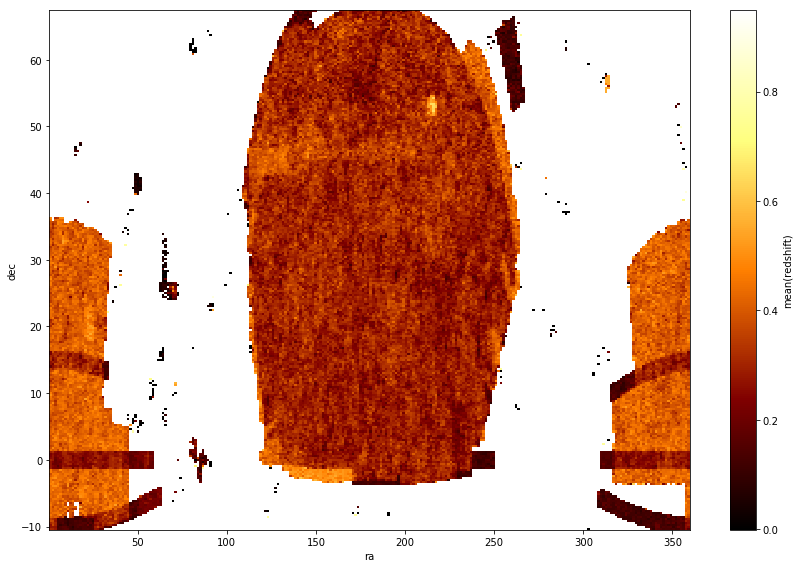

In [6]:
dataset.plot('ra', 'dec', what='mean(redshift)', figsize=(12,8))


In [7]:
dataset.add_column_healpix()

/Users/ong017/anaconda3/envs/astro/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/ong017/anaconda3/envs/astro/lib/python3.5/site-packages/healpy/pixelfunc.py:270: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/ong017/anaconda3/envs/astro/lib/python3.5/site-packages/numpy/ma/core.py:2296: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/ong017/anaconda3/envs/astro/lib/python3.5/site-packages/healpy/projaxes.py:998: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/ong017/anaconda3/envs/astro/lib/python3.5/site-packages/healpy/projaxes.py:999: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


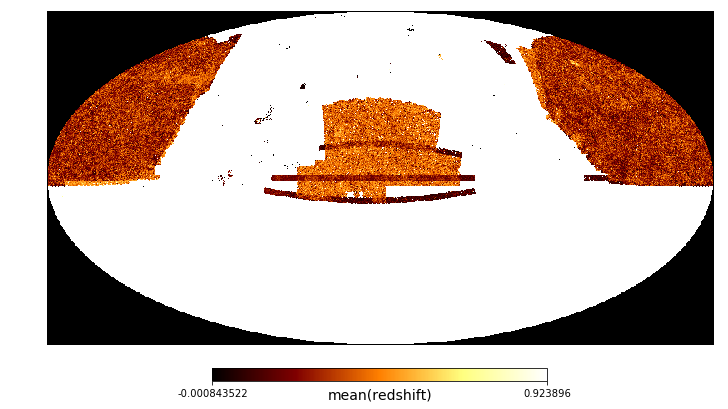

In [8]:
dataset.healpix_plot(dataset.col.healpix, what='mean(redshift)',
                     show=True, healpix_input='galactic', healpix_output='galactic', figsize=(12,8))